## Imports

In [1]:
from context import utils, maml

In [75]:
import yaml
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
import torch

## Parameters

In [3]:
with open('configs/maml_config.yaml', 'r') as yaml_file:
        spec_params = yaml.load(yaml_file, yaml.SafeLoader)
        
with open('configs/test_base_config.yaml', 'r') as base_yaml_file:
        base_params = yaml.load(base_yaml_file, yaml.SafeLoader)

In [4]:
maml_parameters = utils.parameters.MAMLParameters(base_params)

In [5]:
maml_parameters.update(spec_params)
maml_parameters.set_property('device', 'cpu')

In [6]:
maml_parameters.show_all_parameters()

{'experiment_name': 'vanilla', 'seed': 0, 'use_gpu': False, 'resume': {'model': None, 'priority_queue': None, 'queue_counts': None}, 'task_type': 'sin', 'training_iterations': 10000000, 'task_batch_size': 25, 'meta_lr': 0.01, 'inner_update_k': 10, 'inner_update_lr': 0.01, 'num_inner_updates': 1, 'validation_num_inner_updates': 100, 'validation_k': 100, 'test_k': 10, 'validation_task_batch_size': 10, 'validation_frequency': 10, 'visualisation_frequency': 10, 'x_dim': 1, 'input_dimension': 1, 'network_layers': [40, 40], 'output_dimension': 1, 'fixed_validation': False, 'priority_sample': True, 'sin': {'domain_bounds': [-5, 5], 'amplitude_bounds': [0.1, 0.5], 'phase_bounds': [0, 180], 'fixed_val_blocks': [0.05, 5]}, 'priority_queue': {'sample_type': 'epsilon_greedy', 'epsilon_start': 1.0, 'epsilon_final': 0.1, 'epsilon_decay_start': 10000000, 'epsilon_decay_rate': 1e-07, 'block_sizes': [0.05, 5], 'param_ranges': [[0.1, 0.5], [0, 180]], 'burn_in': None, 'initial_value': None}, 'device': 'c

## Init Sine Network

In [112]:
SN = maml.sinusoid._SinusoidalNetwork(maml_parameters)

## Init Sine MAML Class (For batch generation only)

In [113]:
SM = maml.sinusoid.SineMAML(maml_parameters, 'cpu')

In [114]:
generate_batch = SM._generate_batch

In [115]:
sample_task = SM._sample_task

In [116]:
compute_loss = SM._compute_loss

## Train network

In [117]:
num_iterations = 1000
lr = 0.01
k = 100

In [118]:
def train(k, num, network):
    
    optimiser = optim.Adam(network.parameters())

    losses = []

    task = sample_task()
    x, y = generate_batch(task, batch_size=k)

    for i in range(num):

        pred_y = network(x)

        loss = compute_loss(pred_y, y)

        losses.append(float(loss.detach()))

    #     print(i, loss)

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()
    
    return task, x, y, losses, network

## Plot losses

In [99]:
def plot_losses(losses):
    fig = plt.figure()
    plt.plot(range(len(losses)), losses)
    plt.xlabel("step")
    plt.ylabel("loss")
    fig.show()

In [100]:
test = train()

## Show Qualitative Regression

In [101]:
def show_regression(task, x, y, network):
    x_plot = np.linspace(-5, 5, 100)
    y_plot = [task(xi) for xi in x_plot]
    
    plot_x_tensor = torch.tensor([[x] for x in x_plot])
    
    fig = plt.figure()
    plt.plot(x_plot, y_plot)
    plt.scatter(x, y)
    
    pred_y = network(plot_x_tensor)
    
    plt.plot(x_plot, pred_y.cpu().detach().numpy())
    
    fig.show()

/Users/sebastianlee/Dropbox/Documents/Work/Hack/Environments/meta/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


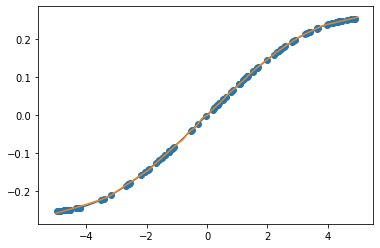

In [102]:
show_regression(test[0], test[1], test[2], SN)

In [119]:
def whole_ting(n, k):
    SN = maml.sinusoid._SinusoidalNetwork(maml_parameters)
    test = train(k=k, num=n, network=SN)
    show_regression(test[0], test[1], test[2], test[4])

/Users/sebastianlee/Dropbox/Documents/Work/Hack/Environments/meta/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


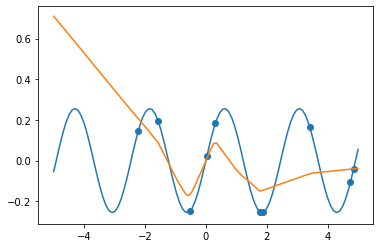

In [120]:
whole_ting(100, 10)

/Users/sebastianlee/Dropbox/Documents/Work/Hack/Environments/meta/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


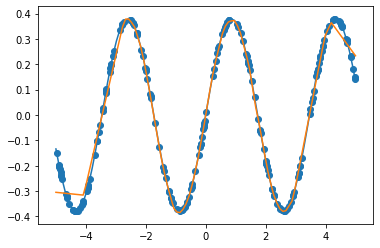

In [122]:
whole_ting(1000, 200)

In [123]:
a = [5,6,2,3,6]

In [124]:
a[:-1]

[5, 6, 2, 3]